## 2.Logistic Regression for Credit Defaults

1. Logistic regression basics

After cleaning data 'clean_loan_data.csv', we'll use it for predicting defaults.

Think back to the final scatter plot from chapter 1 which showed more defaults with high loan_int_rate. Interest rates are easy to understand, but what how useful are they for predicting the probability of default?

Since you haven't tried predicting the probability of default yet, test out creating and training a logistic regression model with just loan_int_rate. Also check the model's internal parameters, which are like settings, to see the structure of the model with this one column.

In [2]:
# Import pandas as pd
import pandas as pd
import matplotlib as mtlb
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [3]:
# Read in the csv file
clean_loan_data = pd.read_csv('clean_loan_data.csv')

In [4]:
# Create the X and y data sets
X = clean_loan_data[['loan_int_rate']]
y = clean_loan_data[['loan_status']]

# Create and fit a logistic regression model
clf_logistic_single = LogisticRegression(solver='lbfgs')
clf_logistic_single.fit(X, np.ravel(y))
print(clf_logistic_single.intercept_)

[-4.45785901]


2. Multivariate logistic regression

Generally, you won't use only loan_int_rate to predict the probability of default. You will want to use all the data you have to make predictions.

With this in mind, try training a new model with different columns, called features, from the data. Will this model differ from the first one? For this, you can easily check the .intercept_ of the logistic regression. Remember that this is the y-intercept of the function and the overall log-odds of non-default.

In [5]:
# Create X data for the model
X_multi =  clean_loan_data[['loan_int_rate','person_emp_length']]

# Create a set of y data for training
y =  clean_loan_data[['loan_status']]

# Create and train a new logistic regression
clf_logistic_multi = LogisticRegression(solver='lbfgs').fit(X_multi, np.ravel(y))

# Print the intercept of the model
print(clf_logistic_multi.intercept_)

[-4.21645549]


3. Creating training and test sets

You've just trained LogisticRegression() models on different columns.

You know that the data should be separated into training and test sets. test_train_split() is used to create both at the same time. The training set is used to make predictions, while the test set is used for evaluation. Without evaluating the model, you have no way to tell how well it will perform on new loan data.

In addition to the intercept_, which is an attribute of the model, LogisticRegression() models also have the .coef_ attribute. This shows how important each training column is for predicting the probability of default.

In [6]:
X = clean_loan_data[['loan_int_rate','person_emp_length','person_income']]
y = clean_loan_data[['loan_status']]

# Use test_train_split to create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=123)

# Create and fit the logistic regression model
clf_logistic = LogisticRegression(solver='lbfgs').fit(X_train, np.ravel(y_train))

# Print the models coefficients
print(clf_logistic.coef_)

[[ 1.28517496e-09 -2.27622202e-09 -2.17211991e-05]]


4. Changing coefficients

With this understanding of the coefficients of a LogisticRegression() model, have a closer look at them to see how they change depending on what columns are used for training. Will the column coefficients change from model to model?

You should .fit() two different LogisticRegression() models on different groups of columns to check. You should also consider what the potential impact on the probability of default might be.

In [7]:
X1 = clean_loan_data[['person_income','person_emp_length','loan_amnt']]
X2 = clean_loan_data[['person_income','loan_percent_income','cb_person_cred_hist_length']]
y = clean_loan_data[['loan_status']]

# Use test_train_split to create the training and test sets
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=.4, random_state=123)
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=.4, random_state=123)

In [8]:
# Print the first five rows of each training set
print(X1_train.head(5))
print(X2_train.head(5))

# Create and train a model on the first training data
clf_logistic1 = LogisticRegression(solver='lbfgs').fit(X1_train, np.ravel(y_train))

# Create and train a model on the second training data
clf_logistic2 = LogisticRegression(solver='lbfgs').fit(X2_train, np.ravel(y_train))

# Print the coefficients of each model
print(clf_logistic1.coef_)
print(clf_logistic2.coef_)

       person_income  person_emp_length  loan_amnt
22105          72000                3.0       9000
2296           21000                2.0       3000
14465           4800                0.0       1200
6311           92000                0.0       6000
12541          96000                1.0       7000
       person_income  loan_percent_income  cb_person_cred_hist_length
22105          72000                 0.13                           6
2296           21000                 0.14                           2
14465           4800                 0.25                           2
6311           92000                 0.07                           3
12541          96000                 0.07                           4
[[-4.02643517e-05 -3.06659219e-08  1.06277246e-04]]
[[-2.17213449e-05  5.29012401e-10 -2.80735543e-09]]


5. One-hot encoding credit data

Let's prepare the non-numeric columns so they can be added to LogisticRegression() model.

Once the new columns have been created using one-hot encoding, we can concatenate them with the numeric columns to create a new data frame which will be used throughout the rest of the course for predicting probability of default.

Note: One-hot encoding is only for non-numeric columns. Doing this to the numeric columns would create an incredibly wide data set!

In [9]:
# Create two data sets for numeric and non-numeric data
cred_num = clean_loan_data.select_dtypes(exclude=['object'])
cred_str = clean_loan_data.select_dtypes(include=['object'])

# One-hot encode the non-numeric columns
cred_str_onehot = pd.get_dummies(cred_str)

# Union the one-hot encoded columns to the numeric ones
cr_loan_prep = pd.concat([cred_num, cred_str_onehot], axis=1)

# Print the columns in the new data set
print(cr_loan_prep.columns)

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length', 'person_home_ownership_MORTGAGE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'loan_grade_A', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D',
       'loan_grade_E', 'loan_grade_F', 'loan_grade_G',
       'cb_person_default_on_file_N', 'cb_person_default_on_file_Y'],
      dtype='object')


6. Predicting probability of default

All of the data processing is complete and it's time to begin creating predictions for probability of default. You want to train a LogisticRegression() model on the data, and examine how it predicts the probability of default.

So that you can better grasp what the model produces with predict_proba, you should look at an example record alongside the predicted probability of default. How do the first five predictions look against the actual values of loan_status?

In [10]:
X = cr_loan_prep.drop(['loan_status'], axis=1)
y = clean_loan_data[['loan_status']]

# Use test_train_split to create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=123)

In [11]:
# Train the logistic regression model on the training data
clf_logistic = LogisticRegression(solver='lbfgs').fit(X_train, np.ravel(y_train))

# Create predictions of probability for loan status using test data
preds = clf_logistic.predict_proba(X_test)

# Create dataframes of first five predictions, and first five true labels
preds_df = pd.DataFrame(preds[:,1][0:5], columns = ['prob_default'])
true_df = y_test.head(5)

# Concatenate and print the two data frames for comparison
print(pd.concat([true_df.reset_index(drop = True), preds_df], axis = 1))

   loan_status  prob_default
0            1      0.445779
1            1      0.223447
2            0      0.288558
3            0      0.169358
4            1      0.114182


7. Default classification reporting

It's time to take a closer look at the evaluation of the model. Here is where setting the threshold for probability of default will help you analyze the model's performance through classification reporting.

Creating a data frame of the probabilities makes them easier to work with, because you can use all the power of pandas. Apply the threshold to the data and check the value counts for both classes of loan_status to see how many predictions of each are being created. This will help with insight into the scores from the classification report.

In [12]:
# Create a dataframe for the probabilities of default
preds_df = pd.DataFrame(preds[:,1], columns = ['prob_default'])

# Reassign loan status based on the threshold
preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > 0.5 else 0)

# Print the row counts for each loan status
print(preds_df['loan_status'].value_counts())

# Print the classification report
target_names = ['Non-Default', 'Default']
print(metrics.classification_report(y_test, preds_df['loan_status'], target_names=target_names))

0    11175
1      609
Name: loan_status, dtype: int64
              precision    recall  f1-score   support

 Non-Default       0.81      0.98      0.89      9198
     Default       0.71      0.17      0.27      2586

    accuracy                           0.80     11784
   macro avg       0.76      0.57      0.58     11784
weighted avg       0.79      0.80      0.75     11784



8. Selecting report metrics

In [13]:
# Print all the non-average values from the report
print(metrics.precision_recall_fscore_support(y_test,preds_df['loan_status'])[:2])

(array([0.80742729, 0.71264368]), array([0.98097412, 0.16782676]))


9. Visually scoring credit models

Now, you want to visualize the performance of the model. In ROC charts, the X and Y axes are two metrics you've already looked at: the false positive rate (fall-out), and the true positive rate (sensitivity).

To calculate the AUC score, use roc_auc_score()

0.8025288526816021
0.7643248801355148


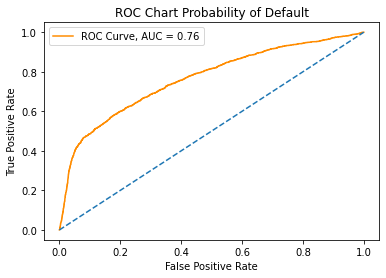

In [14]:
# Print the accuracy score the model
print(clf_logistic.score(X_test, y_test))

# Plot the ROC curve of the probabilities of default
prob_default = preds[:, 1]

# Compute the AUC and store it in a variable
auc = metrics.roc_auc_score(y_test, prob_default)

print(auc)

fallout, sensitivity, thresholds = metrics.roc_curve(y_test, prob_default)
plt.plot(fallout, sensitivity, color = 'darkorange', label='ROC Curve, AUC = %.2f' %(auc))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Chart Probability of Default')
plt.legend()
plt.show()

10. Thresholds and confusion matrices

Set different values for the threshold on probability of default, and use a confusion matrix to see how the changing values affect the model's performance.

In [15]:
# Set the threshold for defaults to 0.5
preds_df.info()
preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > 0.5 else 0)

# Print the confusion matrix
print(metrics.confusion_matrix(y_test,preds_df['loan_status']))
print(metrics.classification_report(y_test, preds_df['loan_status'], target_names=target_names))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11784 entries, 0 to 11783
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   prob_default  11784 non-null  float64
 1   loan_status   11784 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 184.2 KB
[[9023  175]
 [2152  434]]
              precision    recall  f1-score   support

 Non-Default       0.81      0.98      0.89      9198
     Default       0.71      0.17      0.27      2586

    accuracy                           0.80     11784
   macro avg       0.76      0.57      0.58     11784
weighted avg       0.79      0.80      0.75     11784



In [16]:
# Set the threshold for defaults to 0.4
preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > 0.4 else 0)

# Print the confusion matrix
print(metrics.confusion_matrix(y_test,preds_df['loan_status']))
print(metrics.classification_report(y_test, preds_df['loan_status'], target_names=target_names))

[[8476  722]
 [1386 1200]]
              precision    recall  f1-score   support

 Non-Default       0.86      0.92      0.89      9198
     Default       0.62      0.46      0.53      2586

    accuracy                           0.82     11784
   macro avg       0.74      0.69      0.71     11784
weighted avg       0.81      0.82      0.81     11784



Setting the threshold to 0.4 shows promising results for model evaluation. Now you can assess the financial impact using the default recall which is selected from the classification reporting using the function precision_recall_fscore_support().

For this, you will estimate the amount of unexpected loss using the default recall to find what proportion of defaults you did not catch with the new threshold. This will be a dollar amount which tells you how much in losses you would have if all the unfound defaults were to default all at once.

In [17]:
avg_loan_amnt=clean_loan_data['loan_amnt'].mean()

In [18]:
# Reassign the values of loan status based on the new threshold
preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > 0.7 else 0)

# Store the number of loan defaults from the prediction data
num_defaults = preds_df['loan_status'].value_counts()[1]

# Store the default recall from the classification report
default_recall = metrics.precision_recall_fscore_support(y_test,preds_df['loan_status'])[1][1]

# Calculate the estimated impact of the new default recall rate
print(num_defaults * avg_loan_amnt * (1 - default_recall))

219399.9778291099


In [19]:
print(preds_df['loan_status'].value_counts())
print(default_recall)

0    11761
1       23
Name: loan_status, dtype: int64
0.004640371229698376


In [20]:
print(metrics.classification_report(y_test, preds_df['loan_status'], target_names=target_names))
print(metrics.precision_recall_fscore_support(y_test,preds_df['loan_status']))

              precision    recall  f1-score   support

 Non-Default       0.78      1.00      0.88      9198
     Default       0.52      0.00      0.01      2586

    accuracy                           0.78     11784
   macro avg       0.65      0.50      0.44     11784
weighted avg       0.72      0.78      0.69     11784

(array([0.78114106, 0.52173913]), array([0.99880409, 0.00464037]), array([0.87666396, 0.00919893]), array([9198, 2586], dtype=int64))


11. Threshold selection

You know there is a trade off between metrics like default recall, non-default recall, and model accuracy. One easy way to approximate a good starting threshold value is to look at a plot of all three using matplotlib. With this graph, you can see how each of these metrics look as you change the threshold values and find the point at which the performance of all three is good enough to use for the credit data.

In [22]:
thresh=np.linspace(0.2,0.7)
ticks=np.linspace(0.2,0.7,11)
def_recalls=[]
nondef_recalls=[]
accuracy=[]
for i in thresh:
    preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > i else 0)
    def_recalls.append(metrics.precision_recall_fscore_support(y_test,preds_df['loan_status'])[1][1])
    nondef_recalls.append(metrics.precision_recall_fscore_support(y_test,preds_df['loan_status'])[1][0])
    accuracy.append((metrics.confusion_matrix(y_test,preds_df['loan_status'])[1][1]+metrics.confusion_matrix(y_test,preds_df['loan_status'])[0][0])/np.sum(metrics.confusion_matrix(y_test,preds_df['loan_status'])))

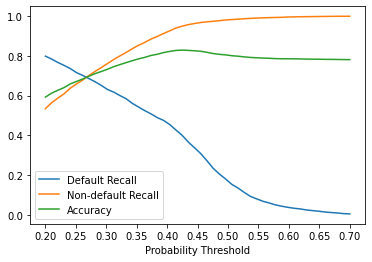

In [23]:
plt.plot(thresh,def_recalls)
plt.plot(thresh,nondef_recalls)
plt.plot(thresh,accuracy)
#plt.plot(thresh,accs)
plt.xlabel("Probability Threshold")
plt.xticks(ticks)
#plt.legend(["Default Recall","Non-default Recall","Model Accuracy"])
plt.legend(["Default Recall","Non-default Recall","Accuracy"])
plt.show()